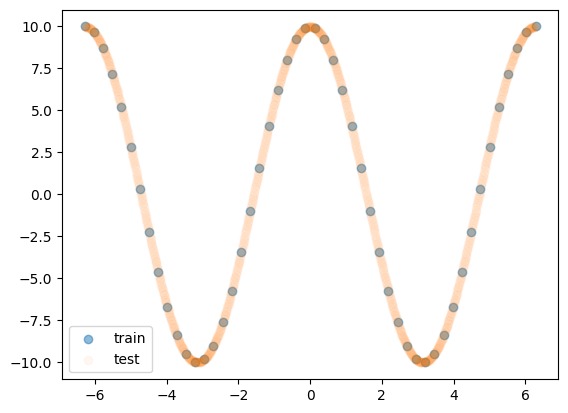

In [1]:
### Load data
import json_tricks as json
import numpy as np
import matplotlib.pyplot as plt
import torch
from KKAN import Dataset
seed = 12
cos_dataset = Dataset(fx = lambda x: 10 * np.cos(x), n = 50, fix = True, seed = seed)
# cos_dataset = Dataset(fx = lambda x: np.exp(-x/2) * np.sin(2 * np.pi * x),  n = 20, fix = False, a = 0, b = 4.0)
plt.scatter(cos_dataset['train_input'],cos_dataset['train_label'],label = 'train', alpha = 0.5)
plt.scatter(cos_dataset['test_input'],cos_dataset['test_label'],label = 'test', alpha = 0.05)
plt.legend()

In [24]:
from DAREK import DAREK
x,y = cos_dataset['test_input'], cos_dataset['test_label']
darek = DAREK([1,2,1], grid=14, k=3, base_fun = 'silu', seed=42, device='cpu')
darek.fit(cos_dataset, opt="Adam", lr = 0.1, steps=500, lamb=0.0, seed_knots = 42, rand_method = 'Kmean', evaluate=True, logsave = False, scheduler="dec", step_sch=50, gamma=0.9);
yhat, yerr = darek.predict(x, fk = 10, f1 = 10, knot_select='nearGj', error_knot_method = 'PN')

checkpoint directory created: ./model
saving model version 0.0


description:   0%|                                                          | 0/500 [00:00<?, ?it/s]

| train_loss: 4.61e-01 | test_loss: 1.05e+00 | reg: 1.30e+01 | : 100%|█| 500/500 [00:06<00:00, 78.96


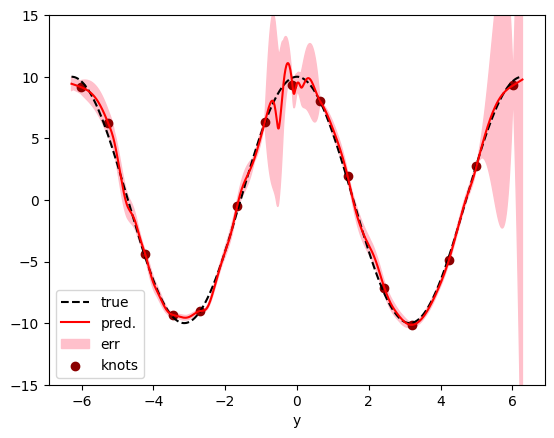

In [25]:
lb,ub = (yhat - yerr), (yhat+yerr)
xg, yg = darek.knots['x'], darek.knots['x2']
plt.plot(x,y, '--', color = 'k', label = 'true')
plt.plot(x, yhat, color = 'red', label = 'pred.')
plt.fill_between(x.flatten(), lb.flatten(), ub.flatten(), color = 'pink', label = 'err')
plt.scatter(xg, yg, color = 'darkred', label = 'knots')
plt.ylim([-15,15])
plt.xlabel('x')
plt.xlabel('y')
plt.legend()